In [1]:
# import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


In [2]:
#Import the dataset

dataset = pd.read_csv('data/Mall_Customers.csv')

dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# total rows and colums in the dataset
dataset.shape

(200, 5)

In [4]:
dataset.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Missing values computation
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Feature sleection for the model

X= dataset.iloc[:, [2,3,4]].values


In [7]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [8]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

X = pd.DataFrame(std_scaler.fit_transform(X), columns = dataset.iloc[:, [2,3,4]].columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [9]:
# elbow method 
from sklearn.cluster import KMeans
cost = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0,)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)


d:\projects\quera\data analysis bootcamp\1401-09\teaching\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\projects\quera\data analysis bootcamp\1401-09\teaching\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\projects\quera\data analysis bootcamp\1401-09\teaching\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\projects\quera\data analysis bootcamp\1401-09\teaching\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

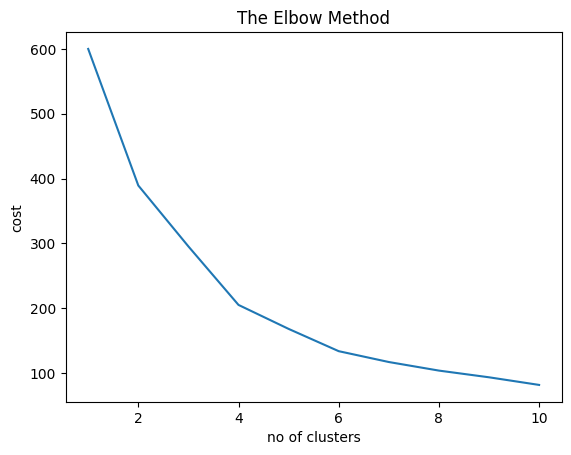

In [10]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), cost)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cost')
plt.show()

In [13]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [11]:

# finally we got that k=5

kmeans_cluster = KMeans(n_clusters= 5, init='k-means++', random_state=0)
kmeans_cluster_pred = kmeans_cluster.fit_predict(X)


d:\projects\quera\data analysis bootcamp\1401-09\teaching\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
kmeans_cluster_pred

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [16]:
from mpl_toolkits import mplot3d

In [15]:
kmeans_cluster.cluster_centers_

array([[ 0.07333084,  0.97494509, -1.19729675],
       [ 1.20484056, -0.23577338, -0.05236781],
       [-0.98067852, -0.74305983,  0.46744035],
       [ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.42880597,  0.97484722,  1.21608539]])

In [25]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


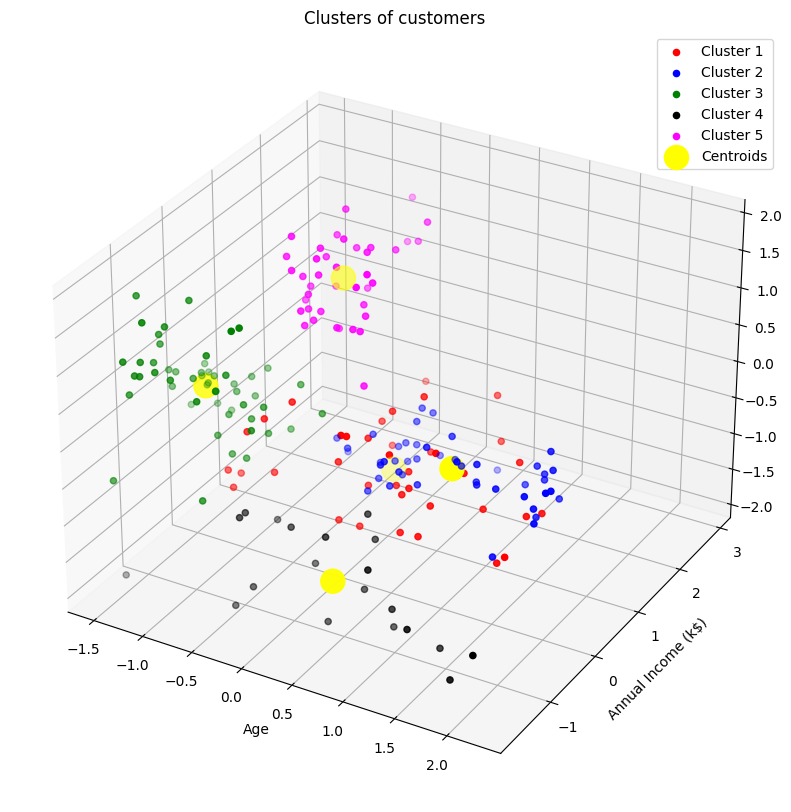

In [17]:
#Visualizing all the clusters 
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.scatter3D(X.iloc[kmeans_cluster_pred == 0, 0], X.iloc[kmeans_cluster_pred == 0, 1], X.iloc[kmeans_cluster_pred == 0, 2], \
             label = 'Cluster 1', c = 'red' )

ax.scatter3D(X.iloc[kmeans_cluster_pred == 1, 0], X.iloc[kmeans_cluster_pred == 1, 1], X.iloc[kmeans_cluster_pred == 1, 2], \
             label = 'Cluster 2', c = 'blue')

ax.scatter3D(X.iloc[kmeans_cluster_pred == 2, 0], X.iloc[kmeans_cluster_pred == 2, 1], X.iloc[kmeans_cluster_pred == 2, 2], \
             label = 'Cluster 3', c = 'green')

ax.scatter3D(X.iloc[kmeans_cluster_pred == 3, 0], X.iloc[kmeans_cluster_pred == 3, 1], X.iloc[kmeans_cluster_pred == 3, 2], \
             label = 'Cluster 4', c = 'black')

ax.scatter3D(X.iloc[kmeans_cluster_pred == 4, 0], X.iloc[kmeans_cluster_pred == 4, 1], X.iloc[kmeans_cluster_pred == 4, 2], \
             label = 'Cluster 5', c = 'magenta')

ax.scatter3D(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], kmeans_cluster.cluster_centers_[:, 2]\
            ,s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()



# Model Interpretation 
## Cluster 1 (Red Color) ->  Earning high , spending less
## cluster 2 (Blue Colr) -> Earning high , spending less 
## cluster 3 (Green Color) -> Earning average, but spending High [TARGET SET]
## cluster 4 (black Color) -> Less earning and spending 
## Cluster 5 (magenta Color) -> High earning and spending [RICH TARGET SET]
